<a href="https://colab.research.google.com/github/vutl/AIO-Exercises/blob/feature%2FGA/Module4/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Triển khai thuật toán**
**1. Khai báo các tham số cần thiết:**
 * **n:** size of individual
 * **m:** size of population
 * **n_generations**: number of generations
 * **losses:** lưu giá trị loss để vẽ biểu đồ

**2. Khởi tạo các hàm tính toán cần thiết: các bạn có thể đặt tên khác, nhưng phải rõ nghĩa, và tuân theo quy tắc đặt tên hàm**
* **compute_loss(individual):** hàm tính loss theo individual (trọng số)
* **compute_fitness(individual):**
* **create_individual():** tạo một cá thể (tham số theta)
* **crossover(individual1, individual2, crossover_rate = 0.9):** hàm crossover giữa 2 individual
* **mutate(individual, mutation_rate = 0.05):** hàm mutation
* **selection(sorted_old_population):** hàm chọn lọc
* **create_new_population(old_population, elitism=2, gen=1):** hàm tạo population mới

**3. Thực hiện huấn luyện:**
* **Initial Population:** Khởi tạo quần thể (population) một cách ngẫu nhiên
* **Fitness function:** Hàm đánh giá độ tốt của một cá thể. Giá trị càng lớn thì cá thể càng tốt.
* **Selection:** Bước chọn lọc những cá thể tốt trong quần thể
* **Cross-over:** Bước lai tạo (trao đổi gen) giữa các cá thể.
* **Mutation:** Bước đột biến cho một cá thể (thay đổi gen một cách ngẫu nhiên)

Giải thuật GAs thực hiện bước (a) một lần ban đầu, và các bước từ (b) đến (e) được thực hiện
cho mỗi generation.

In [28]:
import numpy as np

# Function to load data from the advertising.csv file
def load_data_from_file(file_name='advertising.csv'):
    # Using numpy to read the data from the CSV file
    data = np.genfromtxt(file_name, dtype=float, delimiter=',', skip_header=1)
    features_X = data[:, :3]  # First three columns (TV, Radio, Newspaper)
    sales_Y = data[:, 3]      # Fourth column (Sales)

    return features_X, sales_Y

features_X, sales_Y = load_data_from_file()

(features_X[:5], sales_Y[:5])

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5],
        [180.8,  10.8,  58.4]]),
 array([22.1, 10.4, 12. , 16.5, 17.9]))

In [29]:
features_X , _ = load_data_from_file ()
print( features_X [:5 ,:])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]


In [30]:
_ , sales_Y = load_data_from_file ()
print( sales_Y . shape )

(200,)


In [31]:
import random

# Function to create an individual with n genes, each gene is initialized randomly within [-bound/2, bound/2]
def create_individual(n=4, bound=10):
    individual = [random.uniform(-bound / 2, bound / 2) for _ in range(n)]
    return individual

# Create an individual and print the result
individual = create_individual()
individual

[1.2294492647513353,
 2.393500780473648,
 0.5995452747402616,
 -0.10706516153576118]

In [32]:
import numpy as np

# Hàm tính loss cho một cá thể (individual)
def compute_loss(individual):
    theta = np.array(individual)

    # Thêm cột bias (1) để phù hợp với số lượng tham số theta
    X = np.c_[features_X, np.ones(features_X.shape[0])]  # Thêm bias term vào dữ liệu đầu vào
    y_hat = X.dot(theta)  # Dự đoán giá trị sales

    # Tính giá trị mất mát (Mean Squared Error - MSE)
    loss = np.mean((y_hat - sales_Y) ** 2)
    return loss

# Hàm tính giá trị fitness của một cá thể
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)  # Tính fitness dựa trên nghịch đảo của loss
    return fitness_value

# Ví dụ test hàm với cá thể cho trước
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.2938328947793636e-06


In [33]:
import random

def crossover(individual1, individual2, crossover_rate=0.9):
    # Tạo bản sao để giữ lại các cá thể gốc
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    # Kiểm tra tỉ lệ crossover
    if random.random() < crossover_rate:
        # Chọn vị trí ngẫu nhiên để crossover
        crossover_point = random.randint(1, len(individual1) - 1)

        # Trao đổi các phần tử từ crossover_point trở đi giữa 2 cá thể
        individual1_new[crossover_point:], individual2_new[crossover_point:] = (
            individual2_new[crossover_point:], individual1_new[crossover_point:])

    return individual1_new, individual2_new

In [34]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [4.09, 4.82, 3.1, -2.41]
 individual2 :  [3.44, 2.57, -0.79, 4.02]


In [35]:
import random

def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()  # Tạo bản sao của cá thể gốc

    # Duyệt qua từng gene của cá thể
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:  # Kiểm tra nếu gene bị đột biến
            # Thực hiện đột biến bằng cách thay thế gene tại vị trí i với giá trị ngẫu nhiên trong khoảng [-5, 5]
            individual_m[i] = random.uniform(-5, 5)

    return individual_m

In [36]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [37]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [38]:
import random

def selection(sorted_old_population, m=100):
    # Chọn ngẫu nhiên cá thể đầu tiên
    index1 = random.randint(0, m - 1)

    # Chọn ngẫu nhiên cá thể thứ hai khác cá thể đầu tiên
    while True:
        index2 = random.randint(0, m - 1)
        if index2 != index1:
            break

    # Chọn cá thể tốt hơn trong hai cá thể đã chọn
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [39]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)  # Số lượng cá thể trong quần thể cũ
    sorted_population = sorted(old_population, key=compute_fitness)  # Sắp xếp quần thể theo fitness

    # In ra cá thể tốt nhất của thế hệ hiện tại
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])

    new_population = []

    # Tạo quần thể mới cho đến khi đủ số lượng (trừ số elitism)
    while len(new_population) < m - elitism:
        # **Selection**: Chọn hai cá thể tốt từ quần thể cũ
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # **Crossover**: Lai tạo để tạo ra hai cá thể con mới
        offspring1, offspring2 = crossover(parent1, parent2, crossover_rate=0.9)

        # **Mutation**: Thực hiện đột biến trên cá thể con
        offspring1 = mutate(offspring1, mutation_rate=0.05)
        offspring2 = mutate(offspring2, mutation_rate=0.05)

        # Thêm cá thể con mới vào quần thể
        new_population.append(offspring1)
        if len(new_population) < m - elitism:  # Đảm bảo không vượt quá số lượng
            new_population.append(offspring2)

    # **Elitism**: Sao chép trực tiếp các cá thể tốt nhất (elitism) vào quần thể mới
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

In [40]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 360352.47956477 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [41]:
def run_GA():
    n_generations = 100  # Số thế hệ
    m = 600  # Kích thước quần thể

    # Tải dữ liệu
    features_X, sales_Y = load_data_from_file()

    # Khởi tạo quần thể ban đầu
    population = [create_individual(n=4, bound=10) for _ in range(m)]

    losses_list = []

    # Vòng lặp cho từng thế hệ
    for gen in range(n_generations):
        # Tạo quần thể mới từ quần thể cũ
        population, best_loss = create_new_population(population, elitism=2, gen=gen)

        # Lưu giá trị loss của thế hệ hiện tại
        losses_list.append(best_loss)

    return losses_list

In [42]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    # Vẽ đồ thị loss theo từng thế hệ
    plt.figure(figsize=(10, 6))
    plt.plot(losses_list, label='Best Loss per Generation')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.title('Loss Evolution Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

Best loss: 645.8569464865251 with chromosome: [0.04138228184982662, 0.12407733144141986, -0.5660831640106858, 1.2943633205446394]
Best loss: 488.7792499740944 with chromosome: [0.15049327192640316, 1.1842288501006202, -0.8209370318694686, -2.436227995812792]
Best loss: 488.7792499740944 with chromosome: [0.15049327192640316, 1.1842288501006202, -0.8209370318694686, -2.436227995812792]
Best loss: 201.45369272759433 with chromosome: [-0.0361989916681873, 0.8875426852483841, -0.14027277928367, -1.1707590001139403]
Best loss: 19.416878153322127 with chromosome: [0.04138228184982662, 0.3648717964557644, 0.012071299560776794, -0.5995962893833839]
Best loss: 19.416878153322127 with chromosome: [0.04138228184982662, 0.3648717964557644, 0.012071299560776794, -0.5995962893833839]
Best loss: 19.416878153322127 with chromosome: [0.04138228184982662, 0.3648717964557644, 0.012071299560776794, -0.5995962893833839]
Best loss: 19.416878153322127 with chromosome: [0.04138228184982662, 0.3648717964557644

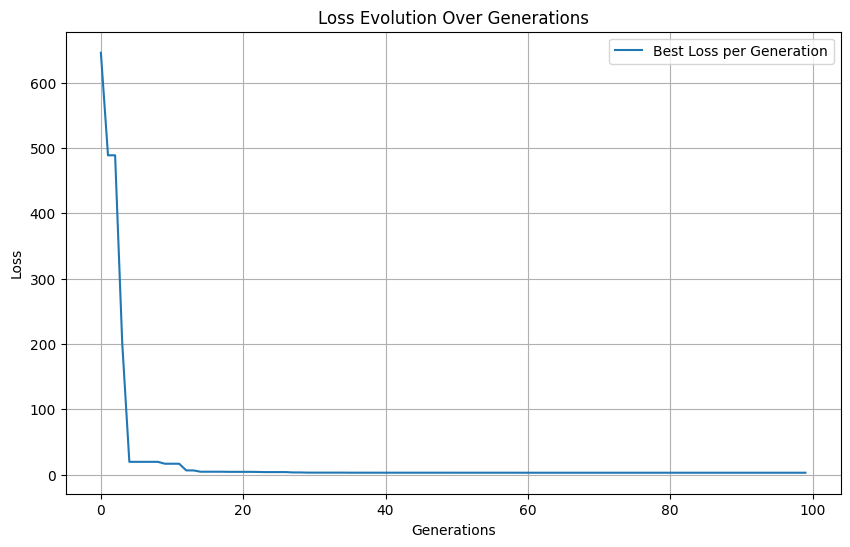

In [43]:
losses_list = run_GA ()
visualize_loss ( losses_list )

Best loss: 404.8561945216554 with chromosome: [-0.08402329488537674, 1.2820277371267768, -0.14081939263847332, 4.328785205129984]
Best loss: 404.8561945216554 with chromosome: [-0.08402329488537674, 1.2820277371267768, -0.14081939263847332, 4.328785205129984]
Best loss: 218.05398277924658 with chromosome: [-0.021856594550592412, 0.9923804547360957, 0.032117019026264515, -3.7910275528425688]
Best loss: 218.05398277924658 with chromosome: [-0.021856594550592412, 0.9923804547360957, 0.032117019026264515, -3.7910275528425688]
Best loss: 218.05398277924658 with chromosome: [-0.021856594550592412, 0.9923804547360957, 0.032117019026264515, -3.7910275528425688]
Best loss: 131.13296541447772 with chromosome: [-0.01700325257013624, 0.6628546464090217, -0.24254613445217732, 4.328785205129984]
Best loss: 111.57208242682816 with chromosome: [-0.01700325257013624, 0.6628546464090217, 0.032117019026264515, 3.4999495343264613]
Best loss: 59.8508164486127 with chromosome: [0.04716149112808399, 0.288338

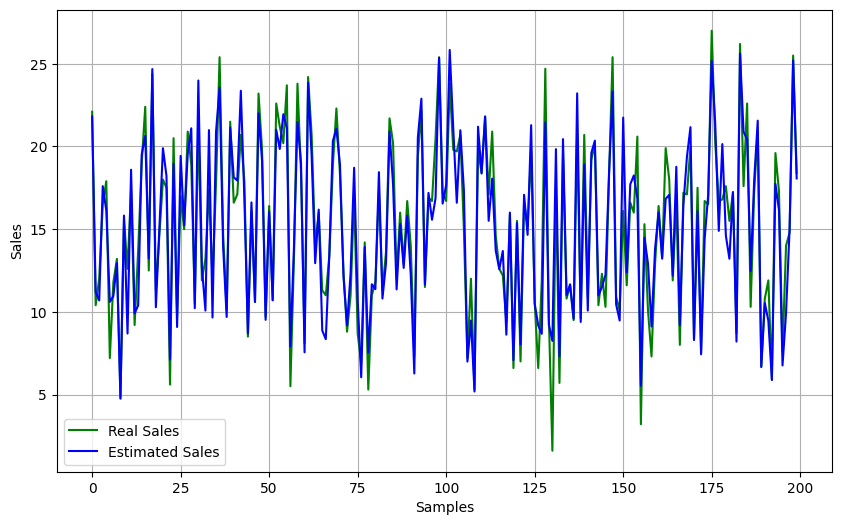

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Các hàm trước đó như create_individual, compute_loss, compute_fitness, selection, crossover, mutate, create_new_population đã được giả định là có sẵn.

# Bước 1: Khởi tạo quần thể ban đầu
def initialize_population(m):
    return [create_individual(n=4, bound=10) for _ in range(m)]

# Bước 2: Chạy giải thuật di truyền để tìm tham số tối ưu
def run_GA():
    n_generations = 100  # Số thế hệ
    m = 600  # Kích thước quần thể

    # Khởi tạo quần thể ban đầu
    population = initialize_population(m)

    losses_list = []

    # Vòng lặp qua từng thế hệ
    for gen in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=gen)

        # Lưu lại giá trị loss tốt nhất
        losses_list.append(best_loss)

    return population, losses_list

# Bước 3: Hàm trực quan hóa kết quả dự đoán sales và giá trị thực tế
def visualize_predict_gt(population):
    # Sắp xếp quần thể để lấy cá thể tốt nhất
    sorted_population = sorted(population, key=compute_fitness)

    # Lấy cá thể tốt nhất
    best_individual = sorted_population[-1]
    print("Best individual:", best_individual)

    # Chuyển cá thể tốt nhất thành mảng numpy
    theta = np.array(best_individual)

    # Thêm cột bias vào features_X
    X_with_bias = np.c_[features_X, np.ones(features_X.shape[0])]  # Thêm cột bias (1)

    # Tính giá trị dự đoán (estimated_prices)
    estimated_prices = X_with_bias.dot(theta)  # Nhân ma trận X với vector theta để tính dự đoán

    # Vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Sales')

    # Vẽ giá trị thực tế
    plt.plot(sales_Y, c='green', label='Real Sales')

    # Vẽ giá trị dự đoán
    plt.plot(estimated_prices, c='blue', label='Estimated Sales')

    plt.legend()
    plt.grid(True)
    plt.show()

# Bước 4: Chạy GA và hiển thị kết quả
population, losses_list = run_GA()
visualize_predict_gt(population)